# Computer Vision Practical - Complete Exercises
## ITA0513 Computer Vision

This notebook contains all 40 practical exercises for Computer Vision.

**Instructions:**
1. Upload the `sources` folder to Google Colab
2. Run the setup cell below
3. Execute each exercise cell as needed

## Setup Cell - Run This First

In [1]:
# Install required packages
!pip install opencv-python-headless matplotlib easyocr

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import os

# Create sources directory if it doesn't exist
os.makedirs('sources', exist_ok=True)

print('Setup complete! Please upload your sources folder files.')
print('You can upload files using the file browser on the left or run the next cell.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 20.4 MB/s eta 0:00:00
Setup complete! Please upload your sources folder files.
You can upload files using the file browser on the left or run the next cell.


## Upload Sources Folder (Optional - use file browser instead)
Uncomment and run if you want to upload files programmatically

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# # Move uploaded files to sources folder
# for filename in uploaded.keys():
#     !mv "{filename}" sources/

---
# Exercise 1: Grayscale Conversion

Original Image:


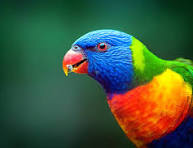


Grayscale Image:


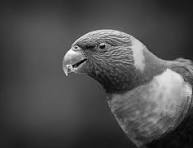

In [9]:
image = cv2.imread('/content/ex1.jpg')

if image is None:
    print(f"Error: Image 'sources/ex1.jpg' not found or could not be loaded.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    print("Original Image:")
    cv2_imshow(image)
    print("\nGrayscale Image:")
    cv2_imshow(gray_image)

---
# Exercise 2: Gaussian Blur

Original Image:


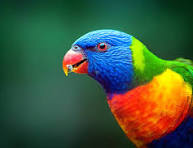


Blurred Image:


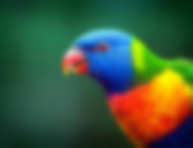

In [11]:
image = cv2.imread('/content/ex1.jpg')
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

print("Original Image:")
cv2_imshow(image)
print("\nBlurred Image:")
cv2_imshow(blurred_image)

---
# Exercise 3: Edge Detection (Canny)

Original Image:


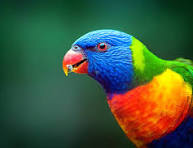


Edge Detected Image:


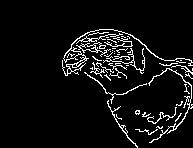

In [12]:
image = cv2.imread('/content/ex1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

print("Original Image:")
cv2_imshow(image)
print("\nEdge Detected Image:")
cv2_imshow(edges)

---
# Exercise 4: Histogram Equalization

Original Grayscale Image:


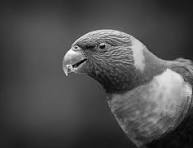


Histogram Equalized Image:


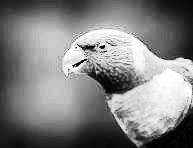

In [13]:
image = cv2.imread('/content/ex1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

print("Original Grayscale Image:")
cv2_imshow(gray_image)
print("\nHistogram Equalized Image:")
cv2_imshow(equalized_image)

---
# Exercise 5: Color Histogram Analysis

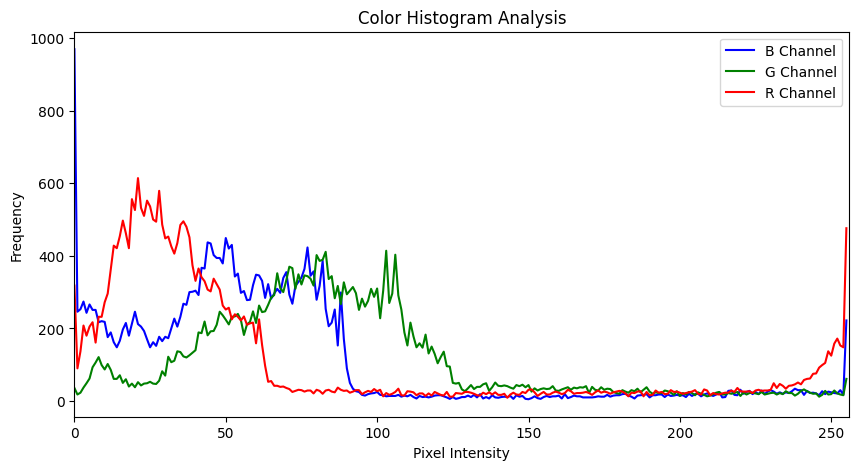

In [14]:
def analyze_histogram(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    color_channels = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(color_channels):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color, label=f"{color.upper()} Channel")
    plt.xlim([0, 256])
    plt.title("Color Histogram Analysis")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

analyze_histogram('/content/ex1.jpg')

---
# Exercise 6: Erosion

Original Image:


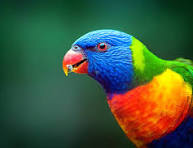


Eroded Image:


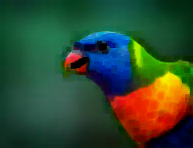

In [15]:
image = cv2.imread('/content/ex1.jpg')
kernel = np.ones((5,5), np.uint8)
eroded_image = cv2.erode(image, kernel, iterations=1)

print("Original Image:")
cv2_imshow(image)
print("\nEroded Image:")
cv2_imshow(eroded_image)

---
# Exercise 7: Video Speed Control

Frame 1:


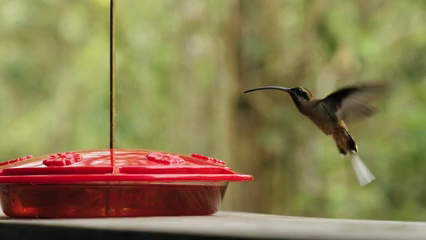

Frame 2:


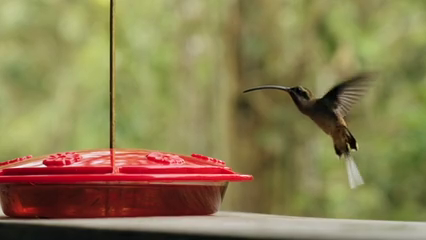

Frame 3:


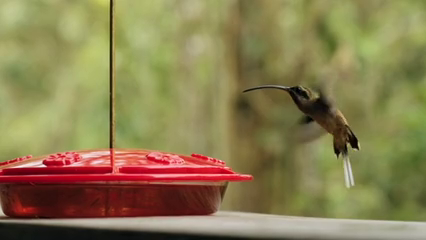

Frame 4:


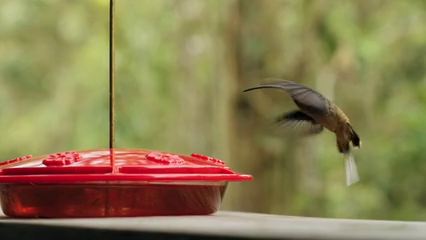

Frame 5:


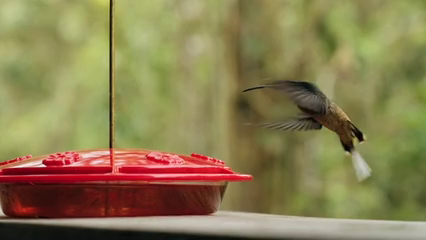

Video processing complete!


In [17]:
# Note: This exercise is for video playback control
# In Colab, you can read and process video frames, but interactive controls won't work
# Here's a simplified version that processes a few frames

video_path = '/content/samplev.mp4'
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    # Read and display first 5 frames
    for i in range(5):
        ret, frame = cap.read()
        if ret:
            print(f"Frame {i+1}:")
            cv2_imshow(frame)
    cap.release()
    print("Video processing complete!")
else:
    print("Error: Could not open video file")

---
# Exercise 8: Dilation

Original:


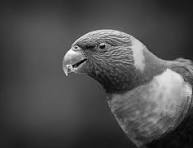


Dilated:


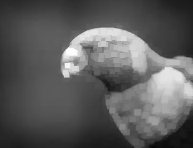

In [18]:
img = cv2.imread('/content/ex1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(gray, kernel, iterations=1)

print("Original:")
cv2_imshow(gray)
print("\nDilated:")
cv2_imshow(dilated)

---
# Exercise 9: Image Scaling

Original:


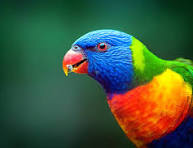


Scaled Up (1.5x):


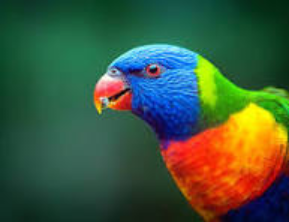


Scaled Down (0.5x):


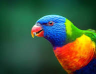

In [19]:
img = cv2.imread('/content/ex1.jpg')
height, width = img.shape[:2]

scale_up = cv2.resize(img, (int(width*1.5), int(height*1.5)), interpolation=cv2.INTER_LINEAR)
scale_down = cv2.resize(img, (int(width*0.5), int(height*0.5)), interpolation=cv2.INTER_AREA)

print("Original:")
cv2_imshow(img)
print("\nScaled Up (1.5x):")
cv2_imshow(scale_up)
print("\nScaled Down (0.5x):")
cv2_imshow(scale_down)

---
# Exercise 10: Image Rotation (90 degrees)

Original:


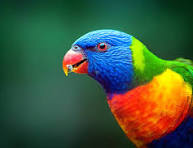


90 Degree Clockwise:


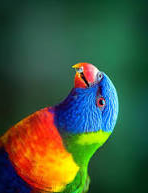

In [20]:
img = cv2.imread('/content/ex1.jpg')
rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

print("Original:")
cv2_imshow(img)
print("\n90 Degree Clockwise:")
cv2_imshow(rotated)

---
# Exercise 11: 180 Degree Y-axis Rotation (Horizontal Flip)

Original:


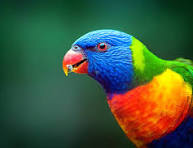


180 Degree Y-axis Rotation:


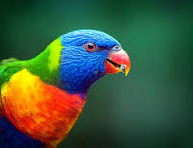

In [21]:
img = cv2.imread('/content/ex1.jpg')
rotated_y = cv2.flip(img, 1)

print("Original:")
cv2_imshow(img)
print("\n180 Degree Y-axis Rotation:")
cv2_imshow(rotated_y)

---
# Exercise 12: 270 Degree Y-axis Rotation

Original:


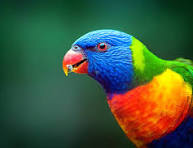


270 Degree Y-axis Rotation:


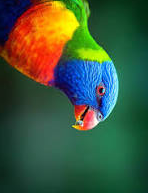

In [22]:
img = cv2.imread('/content/ex1.jpg')
flipped = cv2.flip(img, 1)
rotated_270_y = cv2.rotate(flipped, cv2.ROTATE_90_CLOCKWISE)

print("Original:")
cv2_imshow(img)
print("\n270 Degree Y-axis Rotation:")
cv2_imshow(rotated_270_y)

---
# Exercise 13: Affine Transformation

Original:


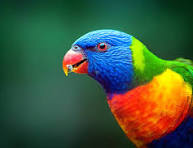


Affine Transformed:


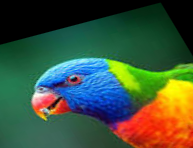

In [23]:
img = cv2.imread('/content/ex1.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

print("Original:")
cv2_imshow(img)
print("\nAffine Transformed:")
cv2_imshow(dst)

---
# Exercise 14: Perspective Transformation

Original:


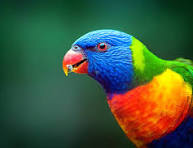


Perspective Transformed:


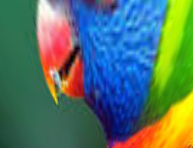

In [24]:
img = cv2.imread('/content/ex1.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[50,50], [cols-50,50], [50,rows-50], [cols-50,rows-50]])
pts2 = np.float32([[0,0], [cols,0], [50,rows], [cols-50,rows]])

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (cols, rows))

print("Original:")
cv2_imshow(img)
print("\nPerspective Transformed:")
cv2_imshow(dst)

---
# Exercise 15: Harris Corner Detection

Harris Corners (marked in red):


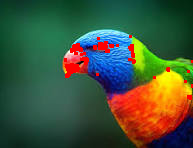

In [25]:
img = cv2.imread('/content/ex1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

print("Harris Corners (marked in red):")
cv2_imshow(img)

---
# Exercise 16: Sobel Edge Detection

Original:


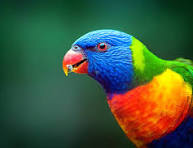


Sobel X:


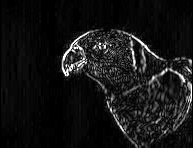


Sobel Y:


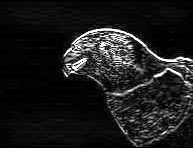


Sobel Combined:


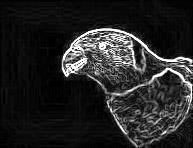

In [26]:
img = cv2.imread('/content/ex1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

print("Original:")
cv2_imshow(img)
print("\nSobel X:")
cv2_imshow(cv2.convertScaleAbs(sobel_x))
print("\nSobel Y:")
cv2_imshow(cv2.convertScaleAbs(sobel_y))
print("\nSobel Combined:")
cv2_imshow(sobel_combined)

---
# Exercise 17: Image Watermarking

Original:


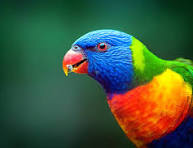


Watermarked:


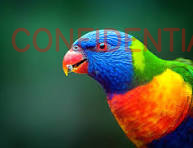

In [29]:
img = cv2.imread('/content/ex1.jpg')
watermarked = img.copy()

text = "CONFIDENTIAL"
position = (10, 50)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (0, 0, 255)
thickness = 2

overlay = watermarked.copy()
cv2.putText(overlay, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
alpha = 0.3
cv2.addWeighted(overlay, alpha, watermarked, 1 - alpha, 0, watermarked)

print("Original:")
cv2_imshow(img)
print("\nWatermarked:")
cv2_imshow(watermarked)

---
# Exercise 18: ROI (Region of Interest) Copy & Paste

Image with ROI pasted at bottom-right:


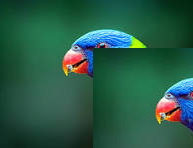

In [30]:
image = cv2.imread('/content/ex1.jpg')
img_h, img_w = image.shape[:2]

y, x, h, w = 0, 0, 100, 100
roi = image[y:y+h, x:x+w].copy()

dest_y = img_h - h
dest_x = img_w - w

image[dest_y:dest_y+h, dest_x:dest_x+w] = roi

print("Image with ROI pasted at bottom-right:")
cv2_imshow(image)

---
# Exercise 19: Erosion Operation

Original Image:


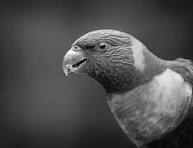


Erosion Result:


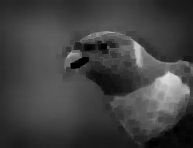

In [31]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)

print("Original Image:")
cv2_imshow(img)
print("\nErosion Result:")
cv2_imshow(img_erosion)

---
# Exercise 20: Dilation Operation

Original Image:


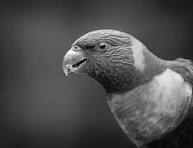


Dilation Result:


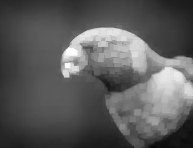

In [32]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=1)

print("Original Image:")
cv2_imshow(img)
print("\nDilation Result:")
cv2_imshow(img_dilation)

---
# Exercise 21: Morphological Opening

Original Image:


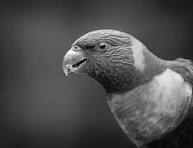


Opening (Erosion then Dilation):


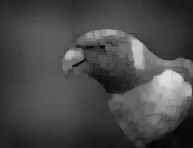

In [33]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

print("Original Image:")
cv2_imshow(img)
print("\nOpening (Erosion then Dilation):")
cv2_imshow(img_opening)

---
# Exercise 22: Morphological Closing

Original Image:


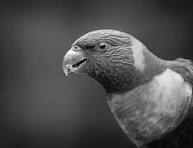


Closing (Dilation then Erosion):


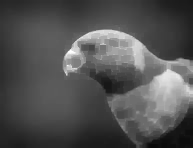

In [34]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

print("Original Image:")
cv2_imshow(img)
print("\nClosing (Dilation then Erosion):")
cv2_imshow(img_closing)

---
# Exercise 23: Morphological Top Hat

Original Image:


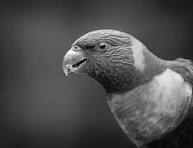


Top Hat Result:


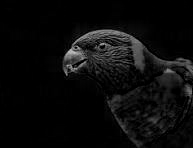

In [35]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((15, 15), np.uint8)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

print("Original Image:")
cv2_imshow(img)
print("\nTop Hat Result:")
cv2_imshow(img_tophat)

---
# Exercise 24: Morphological Black Hat

Original Image:


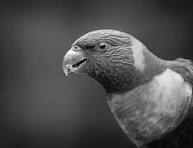


Black Hat Result:


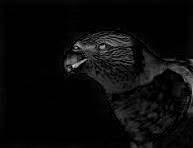

In [36]:
img = cv2.imread('/content/ex1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((15, 15), np.uint8)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

print("Original Image:")
cv2_imshow(img)
print("\nBlack Hat Result:")
cv2_imshow(img_blackhat)

---
# Exercise 25: Watch Recognition (Simplified for Colab)

Original:


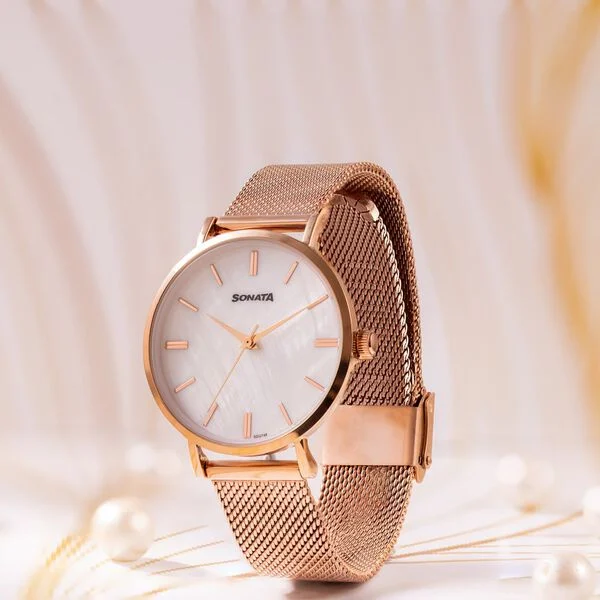


Watch Detection Result:


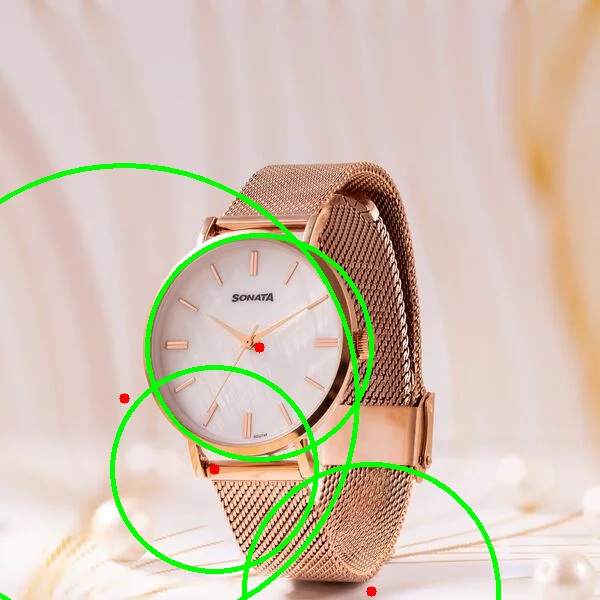

In [37]:
# Simplified watch detection using Hough Circles
image = cv2.imread('/content/watches_temp.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=100,
    param1=100,
    param2=60,
    minRadius=80,
    maxRadius=250
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center_x, center_y, radius = circle[0], circle[1], circle[2]
        cv2.circle(image, (center_x, center_y), radius, (0, 255, 0), 4)
        cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)

print("Original:")
cv2_imshow(original)
print("\nWatch Detection Result:")
cv2_imshow(image)

---
# Exercise 26: Reverse Video

In [38]:
def reverse_video(input_path, output_path):
    video = cv2.VideoCapture(input_path)
    if not video.isOpened():
        print("Error: Cannot open video file.")
        return

    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    frames = []
    for i in range(frame_count):
        ret, frame = video.read()
        if not ret:
            break
        frames.append(frame)
    video.release()

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
    for frame in reversed(frames):
        out.write(frame)
    out.release()
    print("Video reversed successfully!")

# Example usage
reverse_video('/content/samplev.mp4', 'content/samplev_reversed.mp4')

Video reversed successfully!


---
# Exercise 27: Face Detection

Found 1 faces!


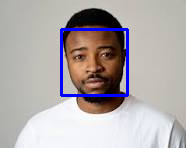

In [39]:
def detect_faces(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    print(f'Found {len(faces)} faces!')
    cv2_imshow(img)

detect_faces('/content/face.png')

---
# Exercise 28: Vehicle Detection in Video

Frame 1 - Detected 2 vehicles:


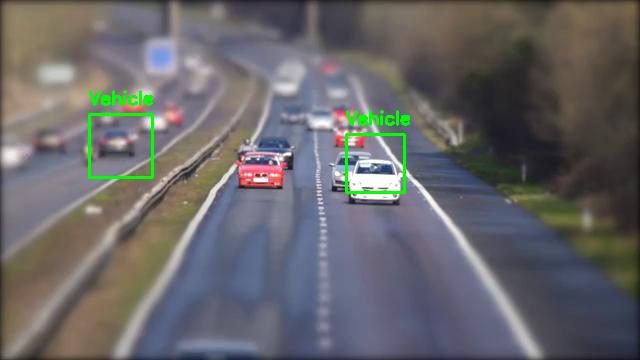

Frame 2 - Detected 2 vehicles:


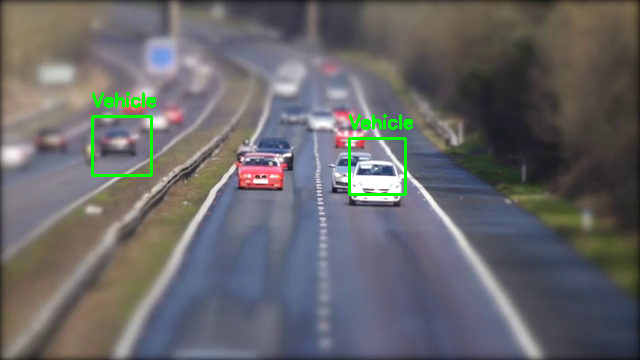

Frame 3 - Detected 2 vehicles:


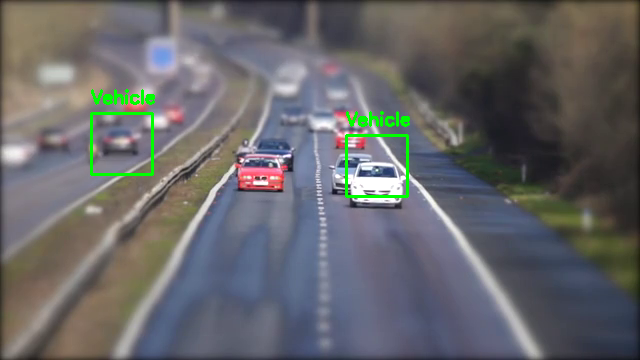

Frame 4 - Detected 2 vehicles:


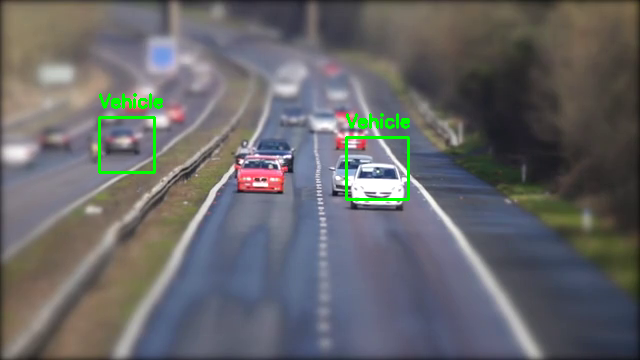

Frame 5 - Detected 2 vehicles:


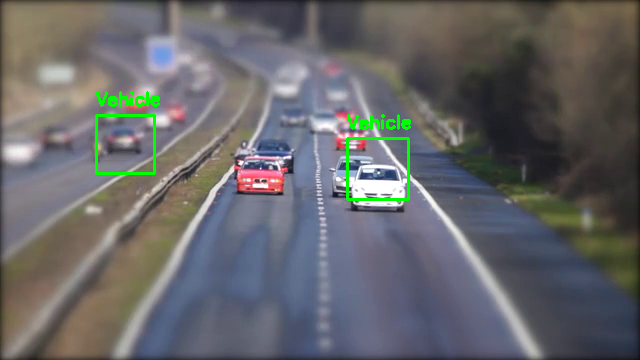

In [40]:
# Load the pre-trained Haar cascade for cars
car_cascade = cv2.CascadeClassifier('/content/cars.xml')

# Process first 5 frames of the video
video_path = '/content/traffic.mp4'
video = cv2.VideoCapture(video_path)

if video.isOpened():
    for i in range(5):
        ret, frame = video.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cars = car_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))

        for (x, y, w, h) in cars:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, "Vehicle", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        print(f"Frame {i+1} - Detected {len(cars)} vehicles:")
        cv2_imshow(frame)

    video.release()
else:
    print("Error: Could not open video.")

---
# Exercise 29: Eye Detection

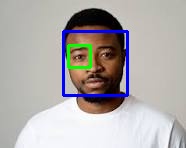

In [41]:
def detect_eyes(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    cv2_imshow(img)

detect_eyes('/content/face.png')

---
# Exercise 30: Smile Detection

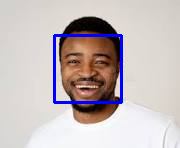

In [42]:
def detect_smile(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 20)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 2)
            cv2.putText(frame, 'Smile Detected', (x, y - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2_imshow(frame)

detect_smile('/content/smile.png')

---
# Exercise 31: Image Segmentation

Original:


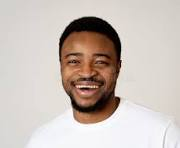


Binary Segmentation:


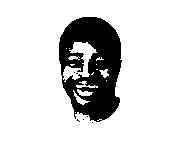


Otsu Segmentation:


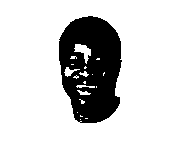


Adaptive Segmentation:


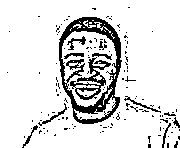

In [43]:
def segment_image(image_path, lower_threshold=127, upper_threshold=255):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(gray, lower_threshold, upper_threshold, cv2.THRESH_BINARY)
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    print("Original:")
    cv2_imshow(image)
    print("\nBinary Segmentation:")
    cv2_imshow(binary)
    print("\nOtsu Segmentation:")
    cv2_imshow(otsu)
    print("\nAdaptive Segmentation:")
    cv2_imshow(adaptive)

segment_image('/content/smile.png')

---
# Exercise 32: Create Image with Colored Boxes

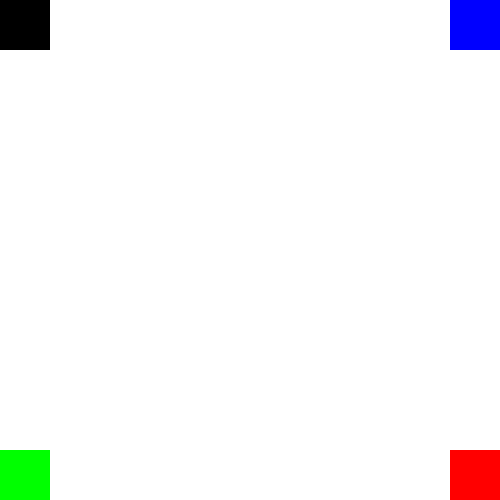

In [44]:
size = 500  # You can change this value
img = np.ones((size, size, 3), dtype=np.uint8) * 255

box_size = size // 10

img[0:box_size, 0:box_size] = [0, 0, 0]  # Black
img[0:box_size, -box_size:] = [255, 0, 0]  # Blue
img[-box_size:, 0:box_size] = [0, 255, 0]  # Green
img[-box_size:, -box_size:] = [0, 0, 255]  # Red

cv2_imshow(img)

---
# Exercise 33: Create White Rectangle

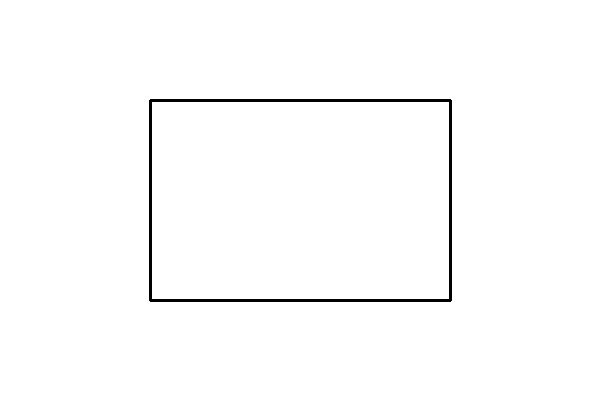

In [45]:
width = 600
height = 400

white_image = np.ones((height, width, 3), np.uint8) * 255

rect_width = width // 2
rect_height = height // 2
x = (width - rect_width) // 2
y = (height - rect_height) // 2

cv2.rectangle(white_image, (x, y), (x + rect_width, y + rect_height), (0, 0, 0), 2)

cv2_imshow(white_image)

---
# Exercise 34: Create Circle Image

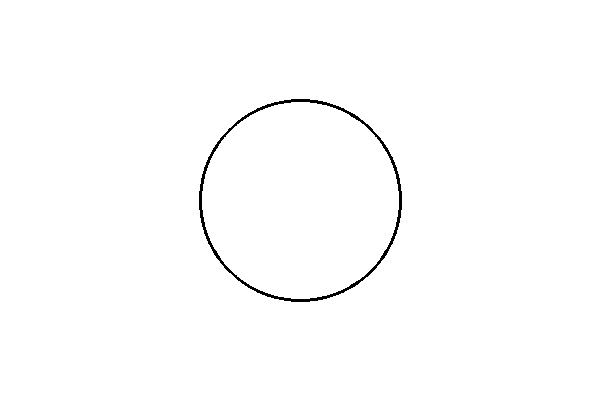

In [46]:
width = 600
height = 400

image = np.ones((height, width, 3), dtype=np.uint8) * 255

center_x = width // 2
center_y = height // 2
circle_radius = min(width, height) // 4

cv2.circle(image, (center_x, center_y), circle_radius, (0, 0, 0), 2)

cv2_imshow(image)

---
# Exercise 35: Add Text to Image

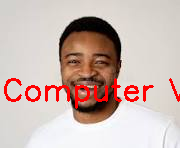

In [51]:
img = cv2.imread('/content/smile.png')

text = "Computer Vision"  # Change this text
x = 2  # X coordinate
y = 100  # Y coordinate

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (0, 0, 255)
thickness = 2

img_with_text = cv2.putText(img, text, (x, y), font, font_scale, color, thickness)

cv2_imshow(img_with_text)

---
# Exercise 36: Subtract Background Color

Background Subtracted:


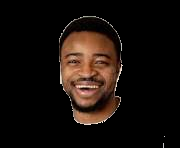

In [52]:
def subtract_background_color(image_path, lower_color, upper_color):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower = np.array(lower_color)
    upper = np.array(upper_color)
    mask = cv2.inRange(hsv, lower, upper)
    mask = cv2.bitwise_not(mask)

    result = cv2.bitwise_and(image, image, mask=mask)
    return result

lower_color = [0, 0, 200]
upper_color = [180, 30, 255]

result = subtract_background_color('/content/smile.png', lower_color, upper_color)

print("Background Subtracted:")
cv2_imshow(result)

---
# Exercise 37: Subtract Foreground

Original:


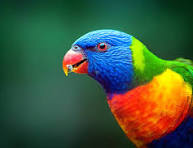


Mask:


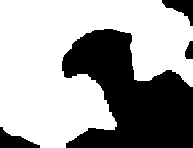


Result:


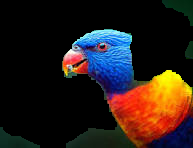

In [53]:
def subtract_foreground(image_path, lower_threshold, upper_threshold):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower = np.array(lower_threshold)
    upper = np.array(upper_threshold)

    mask = cv2.inRange(hsv, lower, upper)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    result = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    return mask, result

lower_green = [35, 50, 50]
upper_green = [85, 255, 255]

mask, result = subtract_foreground('/content/ex1.jpg', lower_green, upper_green)

print("Original:")
cv2_imshow(cv2.imread('/content/ex1.jpg'))
print("\nMask:")
cv2_imshow(mask)
print("\nResult:")
cv2_imshow(result)

---
# Exercise 38: Count Faces

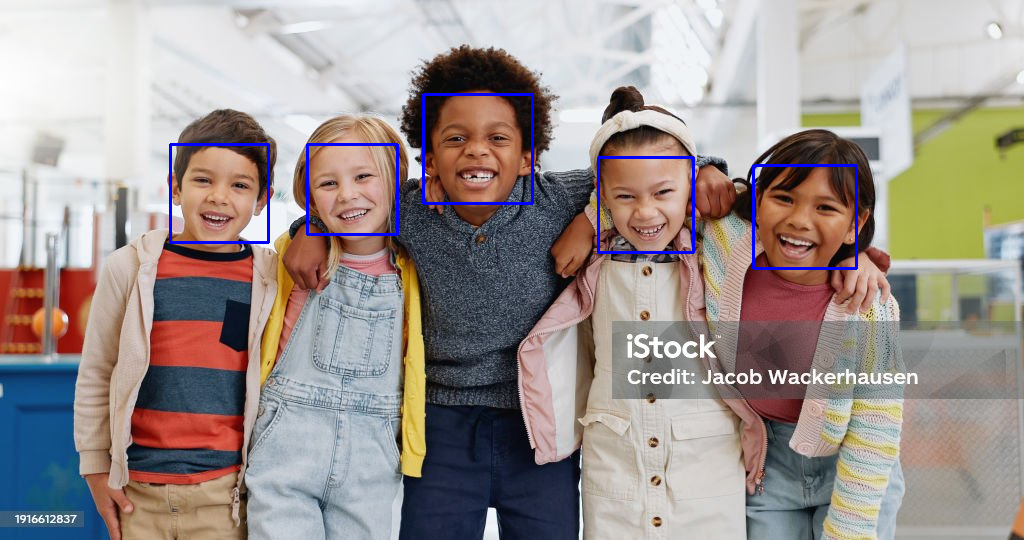

Number of faces detected: 5


In [54]:
def count_faces(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2_imshow(image)
    return len(faces)

face_count = count_faces('/content/group.jpg')
print(f"Number of faces detected: {face_count}")

---
# Exercise 39: Reverse Slow Motion Video

Displaying frames in reverse:
Frame 1:


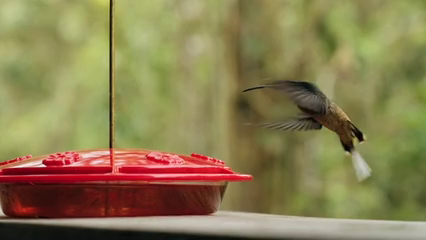

Frame 2:


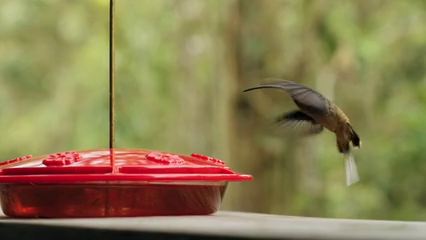

Frame 3:


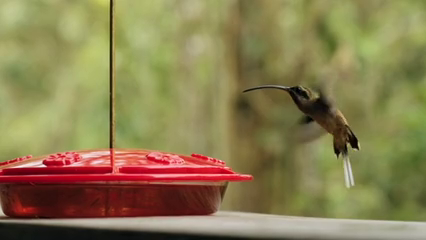

Frame 4:


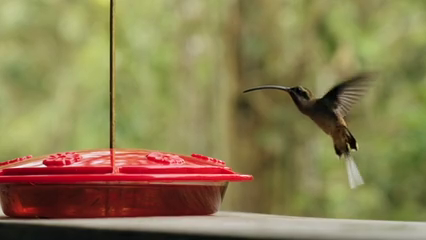

Frame 5:


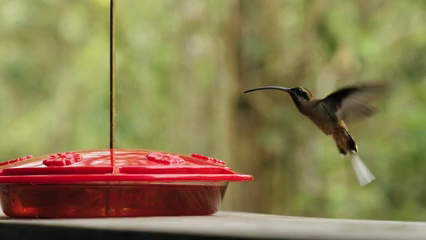

In [55]:
# Note: This displays first 5 frames in reverse
video_file = '/content/samplev.mp4'
cap = cv2.VideoCapture(video_file)

frames = []
for i in range(10):
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

print("Displaying frames in reverse:")
for i, frame in enumerate(reversed(frames[:5])):
    print(f"Frame {i+1}:")
    cv2_imshow(frame)

---
# Exercise 40: Extract Text from Video (OCR)

In [56]:
def extract_text_from_video(video_path):
    import easyocr
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    extracted_text = []

    # Sample every 10th frame
    for frame_no in range(0, min(frame_count, 50), 10):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        if not ret:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = reader.readtext(frame_rgb)
        frame_texts = [text for (bbox, text, prob) in results if prob > 0.5]
        if frame_texts:
            extracted_text.extend(frame_texts)

    cap.release()
    unique_text = list(dict.fromkeys(extracted_text))
    return unique_text

print("Extracting text from video...")
text_results = extract_text_from_video('/content/textvideo.mp4')
print("\nExtracted Text:")
for idx, text in enumerate(text_results, 1):
    print(f"{idx}. {text}")

Extracting text from video...


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Extracted Text:
1. THank You
2. Thank You


---
## End of Exercises

All 40 computer vision practical exercises are complete!

**Note:** Some exercises that require interactive user input or real-time video playback have been simplified for Google Colab compatibility.